<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#本記事の執筆背景" data-toc-modified-id="本記事の執筆背景-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>本記事の執筆背景</a></span></li><li><span><a href="#本記事の概要" data-toc-modified-id="本記事の概要-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>本記事の概要</a></span><ul class="toc-item"><li><span><a href="#実行環境について" data-toc-modified-id="実行環境について-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>実行環境について</a></span></li><li><span><a href="#利用するデータの内容について" data-toc-modified-id="利用するデータの内容について-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>利用するデータの内容について</a></span></li></ul></li><li><span><a href="#データの整形（pandas）" data-toc-modified-id="データの整形（pandas）-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>データの整形（pandas）</a></span><ul class="toc-item"><li><span><a href="#データの読み込み" data-toc-modified-id="データの読み込み-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>データの読み込み</a></span></li><li><span><a href="#データの確認" data-toc-modified-id="データの確認-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>データの確認</a></span></li><li><span><a href="#データの結合" data-toc-modified-id="データの結合-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>データの結合</a></span><ul class="toc-item"><li><span><a href="#頻出回数の計上" data-toc-modified-id="頻出回数の計上-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>頻出回数の計上</a></span><ul class="toc-item"><li><span><a href="#例外データの処理" data-toc-modified-id="例外データの処理-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>例外データの処理</a></span></li></ul></li><li><span><a href="#試用期間を得て本利用に至った会社の判別" data-toc-modified-id="試用期間を得て本利用に至った会社の判別-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>試用期間を得て本利用に至った会社の判別</a></span></li></ul></li></ul></li><li><span><a href="#データの可視化（seaborn）" data-toc-modified-id="データの可視化（seaborn）-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>データの可視化（seaborn）</a></span></li><li><span><a href="#まとめ" data-toc-modified-id="まとめ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>まとめ</a></span></li><li><span><a href="#免責事項" data-toc-modified-id="免責事項-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>免責事項</a></span></li></ul></div>

# 本記事の執筆背景
私は[レッドフォックス株式会社](https://www.redfox.co.jp/)の長期インターンシップに参加しました。当社では「[cyzen](https://www.cyzen.cloud/)」という出退勤管理や業務報告や現場の状況写真の送付、地図上に移動経路や営業先訪問順などを描画する機能を持つ、社員間で情報共有を行う営業支援システムアプリを開発しています。その「cyzen」の利用データ用いてこの度のインターンシップでは実践的なデータ分析を学びました。本記事ではデータ分析を行う上で学んだpandasやseabornを用いた技術についての一部を記事として投稿するものです。

# 本記事の概要
本記事は複数のファイルからデータを読み込み、整形し簡単な可視化をするまでの過程を以下のような内容で記述します。データサイエンス基礎とタイトルにありますがデータ収集の過程はありません、ご了承ください。
 
* pythonのライブラリ"pandas"を用いたデータ整形の解説
* 統計情報を可視化するライブラリ"seaborn"を用いたデータの可視化の解説

## 実行環境について
本記事の実行環境はmacOSにて管理ツールのanacondaを用いたものです。anaconda経由でインストールしたJupyter notebookで実行しています。それぞれの環境に合わせてpandasとseabornを利用できるようにして下さい。
 
* macOS high Sierra(10.13.6)
* anaconda 4.5.11
* python 3.6.5
* pandas 0.23.0
* seaborn 0.8.1

## 利用するデータの内容について
本記事にて用いたデータは上記のcyzenの試用期間を設けており、その期間の顧客毎の企業IDとアプリの各機能の利用履歴です。上記のデータは、<b>個人や企業が特定できない</b>ようマスクされ、利用日時のみの情報と過去データの<b>一部期間をサンプリング抽出したもの</b>です。

利用データはTSV形式でいくつかに別れた状態で与えられているので、それぞれ読み込んだ後にデータを結合する手段をとります。

今回は以下の３つのデータを読み込み、整形、可視化を行います。

* 試用版を利用した顧客IDと試用期間が紐付けされた"trial.tsv"
* 顧客IDとcyzen内の機能で期間内に報告書を送信した回数紐づいた"report.tsv"
* 試用期間が終えた後、本利用に至った顧客IDが羅列された"production.tsv"

TSV形式のデータはTab-Separated Valuesの頭文字でCSV形式のカンマの部分がタブ"\t"と改行で区切られている以下のようなデータです。表示の関係で空白の感覚が不揃いですが、元のファイルではタブで区切られています。

```text:trial.tsv
cid	supply_start_date	supply_end_date	limit_cnt
2259	2017-01-04	2017-01-20	3
2260	2017-01-05	2017-02-28	5
2261	2017-01-05	2017-02-10	10
2263	2017-01-11	2017-02-03	3
2264	2017-01-12	2017-01-30	3
```

```text:report.tsv
cid	reported_at
2260	2017-01-10 04:19:37
2260	2017-01-10 04:25:49
2260	2017-01-10 04:36:51
2261	2017-01-17 07:20:13
2261	2017-01-17 07:22:50
```

```text:production.tsv
cid
2261
2264
2280
2284
2308
```

<b><font color="Red">記事を公開するにあたりcidをマスクするかもしれない</font></b>

# データの整形（pandas）

## データの読み込み

pandasをインポートし、pandasを用いたデータの読み込みを行います。pandasのpandas.read_csv()メソッドでファイルを読み込むとDataframeというオブジェクトとして読み込まれます。

読み込むファイルの区切り文字を"dekimiter='\t'"で指定することでカンマ","以外で区切られるファイルでもread_csv()で読み込むことができます。

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np #良く一緒に使うのでnumpyもimportしておきます。
#%matplotlib inline

trial_df = pd.read_csv('trial_data_20180905/traial.tsv', delimiter='\t')
report_df = pd.read_csv('trial_data_20180905/report.tsv', delimiter='\t')
production_df = pd.read_csv('trial_data_20180905/production.tsv', delimiter='\t')

## データの確認

どのようにデータ読み込まれているか"Dataframe名.head()"や"Dataframe名.info()"を実行して<b>予期した取り込みをしているかしっかり確認</b>します。今回は"trial.tsv"を代表に確認します。

* head()メソッドはDataframe型オブジェクトから頭から指定した行数表示します。
* info()メソッドはDataframe型オブジェクトの有効なデータ数やデータの型などの概要を返してくれます。

```text:trial.tsv
cid	supply_start_date	supply_end_date	limit_cnt
2259	2017-01-04	2017-01-20	3
2260	2017-01-05	2017-02-28	5
2261	2017-01-05	2017-02-10	10
2263	2017-01-11	2017-02-03	3
2264	2017-01-12	2017-01-30	3
```

***

In [2]:
trial_df.head()

,cid,supply_start_date,supply_end_date,limit_cnt
0,2259,2017-01-04,2017-01-20,3
1,2260,2017-01-05,2017-02-28,5
2,2261,2017-01-05,2017-02-10,10
3,2263,2017-01-11,2017-02-03,3
4,2264,2017-01-12,2017-01-30,3


.head()メソッドを使用せずに直接print(Dataframe変数名)を入力しても、通常のpythonで値の格納された変数名を入力した時のように、値を返してくれますが、途中省略がされるものの、結構な行数で返されてしまうので確認がし辛いです。

Dataframe型オブジェクト"trial_df"に、読み込んだファイル内のタブと改行で区切られたデータが行と列に正しく格納されていることが確認できます。Dataframe型オブジェクトは特に指定をしない限り先頭列に"index"として列番号が挿入されます。"index"と"columns"はオブジェクトの処理上扱いが異なるので注意してください。

***

In [3]:
trial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
cid                  211 non-null int64
supply_start_date    211 non-null object
supply_end_date      211 non-null object
limit_cnt            211 non-null int64
dtypes: int64(2), object(2)
memory usage: 6.7+ KB


info()メソッドにより、
* "index"が計211行が0~210で割り振られている
* "columns(列)"が計4列ある
* それぞれ"columns"の名前を先頭に、中身にnullは無く211行が全て埋まり、その"columns"の型を示している
* "columns"の型はint64型が2つ、object型が2つ存在する
* メモリーの使用量が6.7KB程である

といった内容が出力されており、Dataframe型オブジェクトの概要を知る事ができました。

## データの結合

"report.tsv"のcid毎の報告書の送信回数をカウントして"master_df"というDataframe型オブジェクトを作りにデータを１つにまとめて行きます。

columnsの中で同じデータの頻出回数を数える事がvalues_counts()メソッドを使う事で簡単にできます。このメソッドで返ってくるオブジェクトはPandasが提供する"Series"というものです。この"Series"は"Dataframe"のcolumns１つ分の一次元的なデータという扱いです。したがってDataframe型オブジェクトは複数のSeries型オブジェクト集まりという事になります。

データの下処理を行なって行きます。

### 頻出回数の計上

"report_df"内にはcid2310の行データが最高頻出で14314回出現し、以下降順でcid毎の頻出回数が並んでいます。returnのcid部分は"index"、頻出回数部分は"columns"とされたSeries型オブジェクトを"report_count"に格納されています。

In [4]:
report_counts = report_df['cid'].value_counts()
report_counts.head(5)

2310    14314
7859     3166
9946      564
2490      467
2312      293
Name: cid, dtype: int64

***

reset_index()メソッドを用いる事でDataframe型オブジェクトやSeries型オブジェクトに"index"の列を追加する形で再定義できます。ここで"report_count"を表示すると元のcidの"index"が"columns"になって追加される事でSeries型オブジェクトからDataframe型オブジェクトになっている事がわかります。

In [5]:
report_counts = report_counts.reset_index()
report_counts[0:5] #スライス表現でDataframeの中身を見ることも出来ます。

,index,cid
0,2310,14314
1,7859,3166
2,9946,564
3,2490,467
4,2312,293


***

"report_count"のcolumns名をrename()メソッドを使って変更します。Dataframe型オブジェクトのメソッドにはinplace引数を渡せる場合があり、Trueを渡す事でDataframeオブジェクトの内容をメソッド通りに上書きされます。Dataframe型オブジェクトに関するメソッドは基本的に出力されるのみで内容の上書きは行われません。

In [6]:
report_counts.rename(columns={'index':'cid', 'cid':'report_count'}, inplace=True)
report_counts[:5]

,cid,report_count
0,2310,14314
1,7859,3166
2,9946,564
3,2490,467
4,2312,293


***

"report_counts"の情報を確認します。cidが84個となっているので、<b>報告書を送信する機能は84社で利用した</b>という事がわかります。

In [7]:
report_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
cid             84 non-null int64
report_count    84 non-null int64
dtypes: int64(2)
memory usage: 1.4 KB


***

新しくできた"report_count"のDataframe型オブジェクトと"trial_df"をmerge()メソッドを使い結合します。onオプションで"cid"をキー（一致する行にデータ追加）にしhowオプションで'outer'（和集合）として全ての行が残るようにしてreport_countカラムを結合します。

その他にもDataframe型オブジェクトを横方向に結合する場合はconcat()やjoin()なども使うことが出来ます。

In [8]:
master_df =  pd.merge(trial_df, report_counts, on='cid', how='outer')

#### 例外データの処理

"master_df"の状態を確認します。ここで注目したいのは<b>上記の"report_counts.info()"ではreport_countカラムは84個だったのに対し、"master_df.info()"のreport_cointカラムは85個</b>というところです。この情報からcid（顧客）の重複行があるということが推測されます。

In [9]:
master_df.head(5)

,cid,supply_start_date,supply_end_date,limit_cnt,report_count
0,2259,2017-01-04,2017-01-20,3,NaN
1,2260,2017-01-05,2017-02-28,5,3.0
2,2261,2017-01-05,2017-02-10,10,32.0
3,2263,2017-01-11,2017-02-03,3,1.0
4,2264,2017-01-12,2017-01-30,3,3.0


In [10]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 5 columns):
cid                  211 non-null int64
supply_start_date    211 non-null object
supply_end_date      211 non-null object
limit_cnt            211 non-null int64
report_count         85 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.9+ KB


***

"master_df"の重複するcidカラムをカウントします。与えられたファイルには同じ企業が別の期間に利用した例外データが存在するようです。今回は重複データについて行ごと削除するという方針で行きます。cidカラムなどのデータの個が識別できるcolumnをvalue_counts()メソッドで数えると重複を調べる事が出来ます。

In [11]:
master_df['cid'].value_counts().head()

2571    2
2395    2
2465    2
8703    1
8216    1
Name: cid, dtype: int64

余談なのですがquery()メソッドでカラムのデータ内を演算子を使って条件で探すことも出来ます。ここではcidカラムが2571と等しい行が出力されています。

In [12]:
master_df.query('cid == 2571')

,cid,supply_start_date,supply_end_date,limit_cnt,report_count
119,2571,2018-03-03,2018-03-04,3,NaN
120,2571,2018-03-05,2018-03-19,3,NaN


In [13]:
drop_index_list = list(master_df.query('cid == 2571').index)
drop_index_list.extend(list(master_df.query('cid == 2395').index))
drop_index_list.extend(list(master_df.query('cid == 2465').index))
drop_index_list

[119, 120, 58, 59, 85, 86]

duplicated()メソッドを利用すれば重複している行をindex毎にbooleanで取得出来ます。subset引数を用いる事でカラム毎の部分的な重複で検索出来ます。またvalue_counts()メソッドを組み合わせて重複数を得ています。

In [14]:
master_df.duplicated(subset='cid').head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [15]:
master_df.duplicated(subset='cid').value_counts()

False    208
True       3
dtype: int64

全体のデータでは重複している行3社ある事が分かりました。重複している後のデータを削除してしまいます。

drop_duplicates()メソッドを使用すると重複行のデータを削除する事が出来ます。デフォルトでは重複した後の行が削除されますがkeep引数で指定する事が出来ます。

In [16]:
master_df.drop_duplicates(subset='cid', keep='first', inplace=True)

In [17]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 210
Data columns (total 5 columns):
cid                  208 non-null int64
supply_start_date    208 non-null object
supply_end_date      208 non-null object
limit_cnt            208 non-null int64
report_count         84 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.8+ KB


### 試用期間を得て本利用に至った会社の判別

<b><font color="Red">＊契約のTureFalseの話は全て省くか？（現状の記事だとサンプル数と契約の割合が推測されてしまうかもしれない）</font></b>

アプリケーションの試用から製品版の利用に至った顧客にTrueの情報付加し"master_df"に結合します。"production_df"にproductionカラムを追加してTrueでカラムを埋めます。"Dataframe名['カラム名']"とする事でDataframe型オブジェクトやSeries型オブジェクトにカラムを追加する事ができ、代入式でそのまま値を入れる事が出来ます。

In [18]:
production_df['production'] = True
production_df.head()

,cid,production
0,2261,True
1,2264,True
2,2280,True
3,2284,True
4,2308,True


これもmerge()メソッドを使ってcidカラムをキーに"master_df"と"production_df"を和集合で結合します。

In [19]:
master_df =  pd.merge(master_df, production_df, on='cid', how='outer')
master_df.head()

,cid,supply_start_date,supply_end_date,limit_cnt,report_count,production
0,2259,2017-01-04,2017-01-20,3.0,NaN,NaN
1,2260,2017-01-05,2017-02-28,5.0,3.0,NaN
2,2261,2017-01-05,2017-02-10,10.0,32.0,True
3,2263,2017-01-11,2017-02-03,3.0,1.0,NaN
4,2264,2017-01-12,2017-01-30,3.0,3.0,True


prodcutionカラムのNaNをreplace()メソッドを使いFlaseで埋めます。第一引数に検索対象、第二引数に代入値を渡す事で値を入れ替える事が出来ます。

In [20]:
master_df['production'].replace(np.NaN, False, inplace=True)
master_df.head()

,cid,supply_start_date,supply_end_date,limit_cnt,report_count,production
0,2259,2017-01-04,2017-01-20,3.0,NaN,False
1,2260,2017-01-05,2017-02-28,5.0,3.0,False
2,2261,2017-01-05,2017-02-10,10.0,32.0,True
3,2263,2017-01-11,2017-02-03,3.0,1.0,False
4,2264,2017-01-12,2017-01-30,3.0,3.0,True


***

データ整形の操作を行ったあとは都度、確認する事をおすすめします。"master_df"の情報を確認するとproductionカラムを追加した事で<b>cidカラムが１つ増えてしまった</b>事が分かります。これは"trial.tsv"には存在しないcidデータが"production.tsv"に存在する事によるものと推測出来ます。

In [21]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 208
Data columns (total 6 columns):
cid                  209 non-null int64
supply_start_date    208 non-null object
supply_end_date      208 non-null object
limit_cnt            208 non-null float64
report_count         84 non-null float64
production           209 non-null bool
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 10.0+ KB


isnull()メソッドを使用する事でDataframe型オブジェクトの内でnull値やNaN値の部分をTrue、それ以外をFalseで埋まった出力を返します。

In [22]:
master_df.isnull().head()

,cid,supply_start_date,supply_end_date,limit_cnt,report_count,production
0,False,False,False,False,True,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


any()メソッドを使うとカラム毎に結果にTrueが含まれているか、sum()メソッドを使うと出力の中に含まれるTrueの数をカウントし返します。pythonのリスト型オブジェクトに対する感覚と同じようにDataframe型オブジェクトに使う事が出来ます。

In [23]:
print(master_df.isnull().any())
print('\n')
print(master_df.isnull().sum())

cid                  False
supply_start_date     True
supply_end_date       True
limit_cnt             True
report_count          True
production           False
dtype: bool


cid                    0
supply_start_date      1
supply_end_date        1
limit_cnt              1
report_count         125
production             0
dtype: int64


Dataframe型オブジェクトにインデックス参照（"Dataframe名[条件]"の形）の条件へ、booleanのlist型、Series型、Datadrame型オブジェクト渡すとTrueに該当するを行を返す。ここではisnull()メソッドで作られたsupply_start_dateカラムのNaN値が有る行にTrueの入れたSeries型オブジェクトを条件にしている。

In [24]:
master_df[master_df['supply_start_date'].isnull()]

,cid,supply_start_date,supply_end_date,limit_cnt,report_count,production
208,2582,NaN,NaN,NaN,NaN,True


該当する例外データのindexがわかったのでdrop()メソッドにindexを渡し該当行を削除します。

In [25]:
master_df.drop(208, inplace=True)

In [26]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 6 columns):
cid                  208 non-null int64
supply_start_date    208 non-null object
supply_end_date      208 non-null object
limit_cnt            208 non-null float64
report_count         84 non-null float64
production           208 non-null bool
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 10.0+ KB


以上でデータ整形がようやく終わりました。データテーブルを動かす度にデータの情報を確認していなければ

# データの可視化（seaborn）

"master_df"のデータをグラフに起こし、視覚的にデータがどのようになっているかヒストグラムを利用して確認して行きます。

視覚化を行う前に、データの整理の時にも度々行ってきましたがまたデータの状態を確認します。mean()メソッドでカラム毎の数値の平均値やdescribe()メソッドで同じく平均値、標準偏差、最大値、最小値、パーセンタイルなどを簡単に見る事が出来ます。

In [27]:
master_df.head()

,cid,supply_start_date,supply_end_date,limit_cnt,report_count,production
0,2259,2017-01-04,2017-01-20,3.0,NaN,False
1,2260,2017-01-05,2017-02-28,5.0,3.0,False
2,2261,2017-01-05,2017-02-10,10.0,32.0,True
3,2263,2017-01-11,2017-02-03,3.0,1.0,False
4,2264,2017-01-12,2017-01-30,3.0,3.0,True


In [31]:
master_df.mean()

cid             4485.192308
limit_cnt          7.629808
report_count     247.440476
production         0.125000
dtype: float64

In [33]:
master_df.describe(include='all')

,cid,supply_start_date,supply_end_date,limit_cnt,report_count,production
count,208.000000,208,208,208.000000,84.000000,208
unique,NaN,158,158,NaN,NaN,2
top,NaN,2018-04-23,2018-09-30,NaN,NaN,False
freq,NaN,4,6,NaN,NaN,182
mean,4485.192308,NaN,NaN,7.629808,247.440476,NaN
std,3062.374255,NaN,NaN,17.502311,1593.095542,NaN
min,2259.000000,NaN,NaN,3.000000,1.000000,NaN
25%,2381.500000,NaN,NaN,3.000000,2.000000,NaN
50%,2537.000000,NaN,NaN,3.000000,8.000000,NaN
75%,7146.250000,NaN,NaN,10.000000,28.250000,NaN


report_countのパーセンタイルから報告書の送信回数に偏りが見えていました。報告書の送信回数がどのようになっているか企業毎に表示してみましょう。今回はseabornのbarplot()メソッド利用してみます。data引数に使用するDataframe型オブジェクトを、x-y引数にカラム名を引き渡します。（cidは数も桁数も多いのでメモリが潰れてしまっています）

これにより著しく送信回数が多い企業があり、データに偏りが有る事が分かります。視覚化する事により、省くデータの大まかな方針を決めることや、例外値の発見が出来ます。

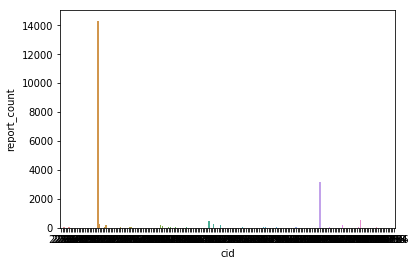

In [87]:
sns.barplot(x='cid', y='report_count', data=master_df)
#import matplotlib as plt
#plt.show()                                ---コンソールなどで表示する場合はmatplotlibをimportしてshow()してください

pandasで簡単にヒストグラムを描くことも出来ます。こちらでも主だったデータ群は報告書の送信回数が2000回以下のデータ分布している事が分かります。後々、例外値を省く時の参考になります。

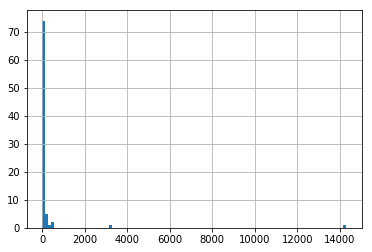

In [96]:
master_df['report_count'].hist(bins=100)

***

seabornのcountoplotで報告書の提出回数の状況のヒストグラムを層別に見てみます。hue引数に分けたい層のカラムを渡すと層毎に簡単にヒストグラムを描画します。y引数を指定する事で水平なグラフにする事が出来ます。

グラフから報告書の送信回数が特に少ない企業は本利用に至らない傾向がある等と仮定し、アプリケーション操作量が本利用に至るか否かのデータとして調べる価値があるのではないか等と推測できます。視覚化する事でデータ分析の指針を立てる事が出来ます。

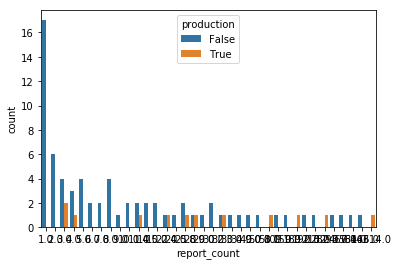

In [100]:
sns.countplot('report_count', data=master_df, hue='production')

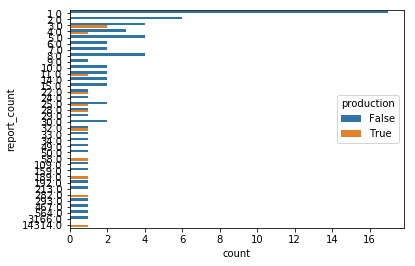

In [101]:
sns.countplot(y='report_count', data=master_df, hue='production')

# まとめ

データの整形をしっかりすれば後の視覚化や機械学習のデータセットとして扱う時に楽になります。実際にこの記事でデータの視覚化を行う場合は一行で終えてしまっています。整形したデータを様々な角度で視覚化し眺める事で取るべき次の分析の手段を決められます。以下の2点がこの記事で言いたい事です。
* データの整形は状態を見ながら適切に行う事で、正しいであろう分析結果を得られるデータセットが作れる
* データの数値的な状態や視覚化して見る事でデータ分析の方針が決められる

今回は自身が実際に行ったpandasを扱ったデータ整形のフローを書き起こす形で記事にしました。ファイル中のデータを扱いやすく配列に組み込む作業である、だけなのですが、自分が思ったようデータを整形する事がなかなか出来ず苦労する部分でした。様々なデータサイエンスや機械学習のチュートリアルでは、予め整形されたデータセットを扱うため、自身でファイルからデータの整形を行う事は無いです。なのでこの記事が、データを整形しデータの傾向を診るに至るまで、どのような手順を踏んでいるかの１つの参考になれば幸いです。

# 免責事項
1. 本記事の投稿をしたアカウントで発信する本記事の情報以外の情報に於いては、投稿する個人の意見が含まれており、必ずしもレッドフォックス株式会社(redfox,Inc.)の見解を代表するものではありません。
2. レッドフォックス株式会社(redfox,Inc.)は、本記事の投稿をしたアカウントにおける投稿の情報の正確性、有用性、及び完全性を保証するものではありません。
3. レッドフォックス株式会社(redfox,Inc.)は、ユーザーにおいて本記事を投稿したアカウントで投稿された情報を利用したこと、または利用することができなかったことによって生じるいかなる損害について一切責任を負いません。 